In [118]:
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
dfa = pd.read_csv('task4/thread-bench.csv')
dfa['speedup'] = dfa['real'][0]/dfa['real']
dfa['index'] = dfa[dfa.columns[0:4]].apply(
    lambda x: ':'.join(x.dropna().astype(str)),
    axis=1
)
dfa = dfa.sort_values('speedup').reset_index()
dfa

level_0 compiler    task  threads  workers  vector-length     real  \
0         2      gcc  openmp        2        1      200000000  357.858   
1         6    intel  openmp        4        1      200000000  276.247   
2         8      gcc  openmp        8        1      200000000  124.799   
3         4    mpicc     mpi        1        2      200000000  118.418   
4         5      gcc  openmp        4        1      200000000  114.274   
5         3    intel  openmp        2        1      200000000   92.847   
6         0      gcc  serial        1        1      200000000   86.253   
7         9    intel  openmp        8        1      200000000   76.917   
8        11    mpicc  hybrid        2        2      200000000   57.666   
9         1    intel  serial        1        1      200000000   55.833   
10       14    mpicc  hybrid        4        2      200000000   43.779   
11       17    mpicc  hybrid        8        2      200000000   33.787   
12       15    mpicc  hybrid        4        4      200000000   20.730   
13        7    mpicc     mpi        1        4      200000000   13.568   
14       18    mpicc  hybrid        8        4      200000000   12.594   
15       12    mpicc  hybrid        2        4      200000000   11.242   
16       10    mpicc     mpi        1        8      200000000    4.901   
17       16    mpicc  hybrid        4        8      200000000    4.168   
18       13    mpicc  hybrid        2        8      200000000    2.228   
19       19    mpicc  hybrid        8        8      200000000    1.294   

     system    user    speedup             index  
0   353.523   0.899   0.241026    gcc:openmp:2:1  
1   276.800   2.499   0.312231  intel:openmp:4:1  
2   125.158   1.339   0.691135    gcc:openmp:8:1  
3   192.875  42.916   0.728377     mpicc:mpi:1:2  
4   114.602   1.112   0.754791    gcc:openmp:4:1  
5    92.601   1.230   0.928980  intel:openmp:2:1  
6    85.453   0.799   1.000000    gcc:serial:1:1  
7    77.128   4.817   1.121378  intel:openmp:8:1  
8   113.743   1.113   1.495734  mpicc:hybrid:2:2  
9    55.192   0.622   1.544839  intel:serial:1:1  
10   84.323   3.001   1.970191  mpicc:hybrid:4:2  
11   66.062   1.098   2.552846  mpicc:hybrid:8:2  
12   50.958   2.077   4.160781  mpicc:hybrid:4:4  
13   37.284   0.722   6.357090     mpicc:mpi:1:4  
14   31.679   1.887   6.848737  mpicc:hybrid:8:4  
15   30.895   0.848   7.672389  mpicc:hybrid:2:4  
16   11.071   0.445  17.599061     mpicc:mpi:1:8  
17   10.476   0.737  20.694098  mpicc:hybrid:4:8  
18    4.907   0.532  38.713196  mpicc:hybrid:2:8  
19    2.141   1.229  66.656105  mpicc:hybrid:8:8

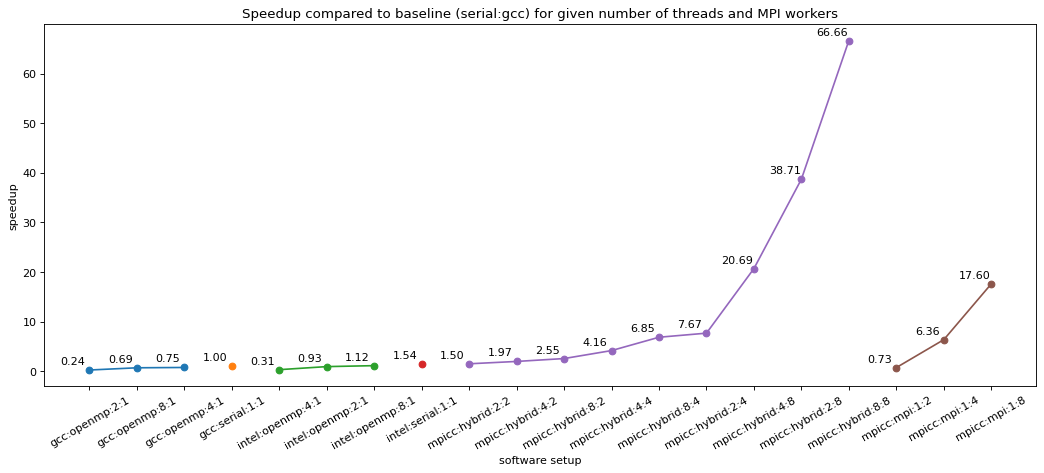

In [120]:
gba = dfa.groupby(['compiler', 'task'])

plt.figure(figsize=(16, 6), dpi=80)

for k in gba.groups.keys():
    d = dfa.iloc[gba.groups[k]]

    plt.plot('index', 'speedup', '-o', data=d, label='speedup')
    plt.xticks(rotation = 30)
    for x,y in zip(d['index'], d['speedup']):
        label = "{:.2f}".format(y)
        plt.annotate(label,
                    (x,y),
                    textcoords="offset points",
                    xytext=(-15,5),
                    ha='center')

plt.title('Speedup compared to baseline (serial:gcc) for given number of threads and MPI workers')
plt.xlabel('software setup')
plt.ylabel('speedup')
plt.show()

In [121]:
from decimal import Decimal

dfb = pd.read_csv('task4/vec-bench.csv')

dfb['speedup'] = 0.0
base = {}
for v in dfb['vector-length'].unique():
    base[v] = dfb.query('`vector-length` == @v and compiler == "gcc" and task == "serial"')['real']

x = []
for index, row in dfb.iterrows():
    z = base[row['vector-length']]/row['real']
    x.append(z.values[0])

dfb['speedup'] = x

dfb['vector-length'] = dfb['vector-length'].apply(
    lambda x: '{:.2E}'.format(Decimal(int(x)))
)
dfb['index'] = dfb[dfb.columns[0:5]].apply(
    lambda x: ':'.join(x.dropna().astype(str)),
    axis=1
)
dfb = dfb.sort_values('speedup').reset_index()
dfb

level_0 compiler    task  threads  workers vector-length    real  system  \
0         4    mpicc  hybrid        4        2       1.00E+6   0.537   0.121   
1         5    mpicc     mpi        1        8       1.00E+6   0.498   0.161   
2        11    mpicc     mpi        1        8       1.00E+7   0.469   0.159   
3        10    mpicc  hybrid        4        2       1.00E+7   0.447   0.148   
4         3    intel  openmp        8        1       1.00E+6   0.017   0.011   
5         0      gcc  serial        1        1       1.00E+6   0.013   0.007   
6         1    intel  serial        1        1       1.00E+6   0.013   0.007   
7         6      gcc  serial        1        1       1.00E+7   0.085   0.033   
8        12      gcc  serial        1        1       2.00E+8  86.253  85.453   
9        14      gcc  openmp        8        1       2.00E+8  80.184  81.007   
10        2      gcc  openmp        8        1       1.00E+6   0.012   0.006   
11        7    intel  serial        1        1       1.00E+7   0.077   0.033   
12       15    intel  openmp        8        1       2.00E+8  75.577  75.692   
13        9    intel  openmp        8        1       1.00E+7   0.074   0.041   
14        8      gcc  openmp        8        1       1.00E+7   0.068   0.035   
15       13    intel  serial        1        1       2.00E+8  55.833  55.192   
16       16    mpicc  hybrid        4        2       2.00E+8  16.769  31.720   
17       17    mpicc     mpi        1        8       2.00E+8   2.447   5.294   

     user    speedup                     index  
0   0.075   0.024209  mpicc:hybrid:4:2:1.00E+6  
1   0.136   0.026104     mpicc:mpi:1:8:1.00E+6  
2   0.168   0.181237     mpicc:mpi:1:8:1.00E+7  
3   0.140   0.190157  mpicc:hybrid:4:2:1.00E+7  
4   0.018   0.764706  intel:openmp:8:1:1.00E+6  
5   0.003   1.000000    gcc:serial:1:1:1.00E+6  
6   0.003   1.000000  intel:serial:1:1:1.00E+6  
7   0.050   1.000000    gcc:serial:1:1:1.00E+7  
8   0.799   1.000000    gcc:serial:1:1:2.00E+8  
9   1.338   1.075688    gcc:openmp:8:1:2.00E+8  
10  0.023   1.083333    gcc:openmp:8:1:1.00E+6  
11  0.041   1.103896  intel:serial:1:1:1.00E+7  
12  5.242   1.141260  intel:openmp:8:1:2.00E+8  
13  0.123   1.148649  intel:openmp:8:1:1.00E+7  
14  0.107   1.250000    gcc:openmp:8:1:1.00E+7  
15  0.622   1.544839  intel:serial:1:1:2.00E+8  
16  1.311   5.143598  mpicc:hybrid:4:2:2.00E+8  
17  0.490  35.248468     mpicc:mpi:1:8:2.00E+8

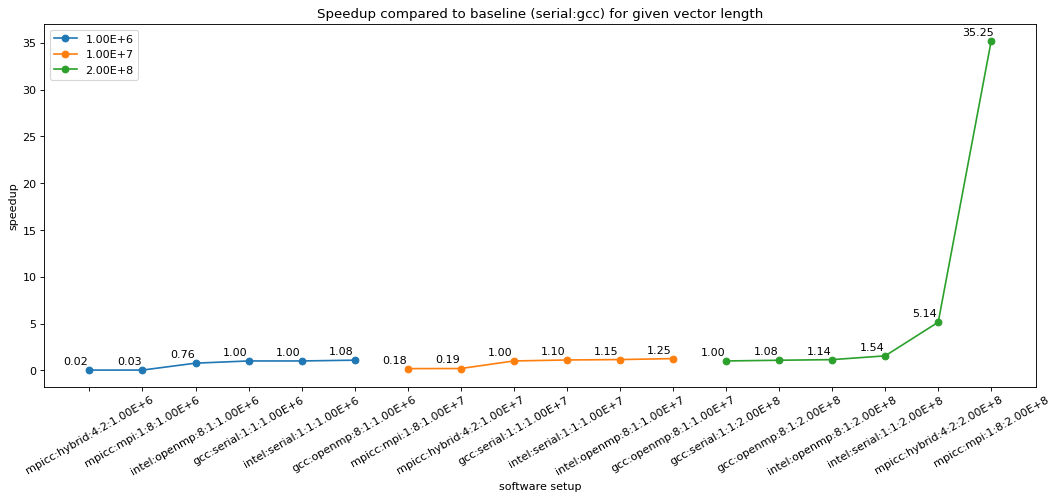

In [122]:
gbb = dfb.groupby(['vector-length'])

plt.figure(figsize=(16, 6), dpi=80)
for k in gbb.groups.keys():
    d = dfb.iloc[gbb.groups[k]]

    plt.plot('index', 'speedup', '-o', data=d)
    plt.xticks(rotation = 30)
    for x,y in zip(d['index'], d['speedup']):
        label = "{:.2f}".format(y)
        plt.annotate(label,
                    (x,y),
                    textcoords="offset points",
                    xytext=(-12, 5),
                    ha='center')
    plt.legend(dfb['vector-length'].unique())

plt.title('Speedup compared to baseline (serial:gcc) for given vector length')
plt.xlabel('software setup')
plt.ylabel('speedup')
plt.show()


In [123]:
dfc = pd.read_csv('task5/bench.csv')
dfc['speedup'] = dfc['real'][0]/dfc['real']
dfc.head()

prog  threads  calculated-time    real  system     user   speedup
0  serial        1             0.00  31.590   0.000   31.586  1.000000
1  pi_omp        2            40.22  40.225   0.002   79.727  0.785333
2  pi_omp        4            35.07  35.088   0.001  130.312  0.900308
3  pi_omp        8            25.35  25.357   0.001  179.484  1.245810

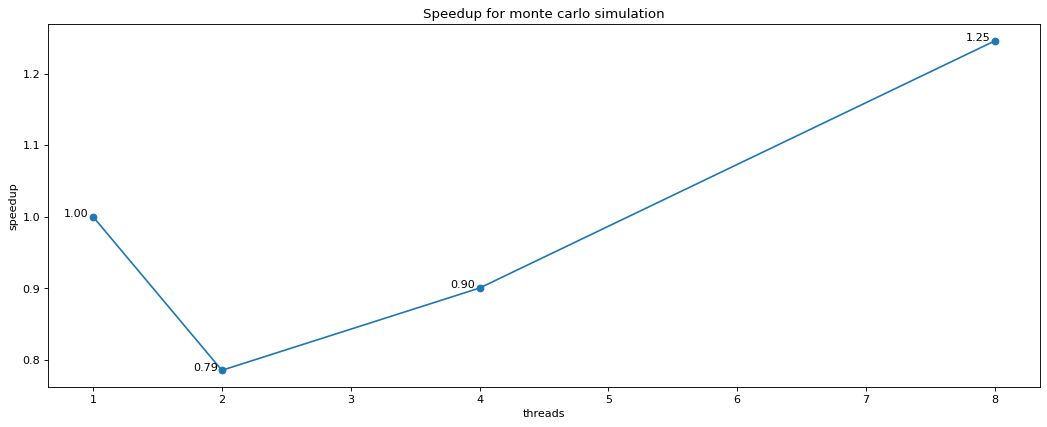

In [124]:
plt.figure(figsize=(16, 6), dpi=80)
plt.plot('threads', 'speedup', '-o', data=dfc)
for x,y in zip(dfc['threads'], dfc['speedup']):
    label = "{:.2f}".format(y)
    plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(-15,0),
                ha='center')
plt.xlabel('threads')
plt.ylabel('speedup')
plt.title('Speedup for monte carlo simulation')
plt.show()